 - Load and Inspect Data.

In [2]:
import pandas as pd
df = pd.read_csv("food-prices-for-nigeria-2017-2021.csv")
df.head()

,ItemLabels,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,Sep-17,...,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Lowest,Highest,Month-on-Month,Year-on-Year
0,Agric eggs medium size,512.99,520.16,507.69,518.66,522.71,514.66,498.50,485.19,487.51,...,556.47,577.55,585.64,604.99,614.89,629.82,Borno (411.67),Bayelsa (800),2.43,27.31
1,Agric eggs(medium size price of one),47.42,42.90,43.93,46.22,45.73,45.28,44.32,42.92,45.72,...,51.22,52.73,53.20,54.62,55.49,57.35,Taraba (41.51),Ogun (70.06),3.35,28.15
2,"Beans brown,sold loose",353.60,337.11,353.28,357.19,365.86,374.26,382.35,370.25,404.84,...,471.24,485.44,496.03,492.13,478.76,490.19,Bauchi (234.29),Anambra (899.4),2.39,46.47
3,Beans:white black eye. sold loose,305.53,309.85,318.45,324.04,332.28,339.64,343.96,335.71,358.13,...,431.79,444.21,457.98,461.59,464.74,476.76,Bauchi (235.22),Ebonyi (887.77),2.59,54.61
4,Beef Bone in,1001.24,995.65,1010.29,1035.45,1123.65,1129.02,1128.94,1151.38,1078.49,...,1220.33,1262.10,1274.20,1320.73,1339.77,1366.24,Taraba (975.2),Abuja (1885.99),1.98,26.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ItemLabels      44 non-null     object 
 1   Jan-17          43 non-null     float64
 2   Feb-17          43 non-null     float64
 3   Mar-17          43 non-null     float64
 4   Apr-17          43 non-null     float64
 5   May-17          43 non-null     float64
 6   Jun-17          43 non-null     float64
 7   Jul-17          43 non-null     float64
 8   Aug-17          43 non-null     float64
 9   Sep-17          43 non-null     float64
 10  Oct-17          43 non-null     float64
 11  Nov-17          43 non-null     float64
 12  Dec-17          43 non-null     float64
 13  Jan-18          43 non-null     float64
 14  Feb-18          43 non-null     float64
 15  Mar-18          43 non-null     float64
 16  Apr-18          43 non-null     float64
 17  May-18          43 non-null     float

- Reshape Data (fron wide to long, for machine learning and plotting)

In [5]:
 # Remove columns we don't need right now
df_small = df.drop(columns=["Month-on-Month","Year-on-Year","Lowest","Highest"],axis=1)

# Reshape:
df_long = df_small.melt(
    id_vars='ItemLabels',
    var_name='Date',
    value_name='Price'
)
df_long.head()

,ItemLabels,Date,Price
0,Agric eggs medium size,Jan-17,512.99
1,Agric eggs(medium size price of one),Jan-17,47.42
2,"Beans brown,sold loose",Jan-17,353.60
3,Beans:white black eye. sold loose,Jan-17,305.53
4,Beef Bone in,Jan-17,1001.24


In [6]:
#Rename ItemLabels to items (just my preference, ItemLabels works fine as well)
df_long.rename(columns={"ItemLabels": "Items"}, inplace= True)
df_long.head()

,Items,Date,Price
0,Agric eggs medium size,Jan-17,512.99
1,Agric eggs(medium size price of one),Jan-17,47.42
2,"Beans brown,sold loose",Jan-17,353.60
3,Beans:white black eye. sold loose,Jan-17,305.53
4,Beef Bone in,Jan-17,1001.24


In [7]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Items   2596 non-null   object 
 1   Date    2655 non-null   object 
 2   Price   2537 non-null   float64
dtypes: float64(1), object(2)
memory usage: 62.4+ KB


- from the info we can see there are some null rows in date and price columns( 2655 total entries, and both those columns,
have less than that total)

In [9]:
#check null values
df_long[df_long["Items"].isna() ]

,Items,Date,Price
43,NaN,Jan-17,NaN
88,NaN,Feb-17,NaN
133,NaN,Mar-17,NaN
178,NaN,Apr-17,NaN
223,NaN,May-17,NaN
268,NaN,Jun-17,NaN
313,NaN,Jul-17,NaN
358,NaN,Aug-17,NaN
403,NaN,Sep-17,NaN
448,NaN,Oct-17,NaN


- rows with no data for items are useless, as we're predicting price of items, so we drop them

In [11]:
#drop all rows with no value in the items column
df_long = df_long.dropna(subset=['Items'])
df_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2596 entries, 0 to 2654
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Items   2596 non-null   object 
 1   Date    2596 non-null   object 
 2   Price   2537 non-null   float64
dtypes: float64(1), object(2)
memory usage: 81.1+ KB


- Price column has some null values, investigate

In [13]:
df_long[ df_long['Price'].isna() ]

,Items,Date,Price
44,Source: The Nigeria Bureau of Statistics,Jan-17,NaN
89,Source: The Nigeria Bureau of Statistics,Feb-17,NaN
134,Source: The Nigeria Bureau of Statistics,Mar-17,NaN
179,Source: The Nigeria Bureau of Statistics,Apr-17,NaN
224,Source: The Nigeria Bureau of Statistics,May-17,NaN
269,Source: The Nigeria Bureau of Statistics,Jun-17,NaN
314,Source: The Nigeria Bureau of Statistics,Jul-17,NaN
359,Source: The Nigeria Bureau of Statistics,Aug-17,NaN
404,Source: The Nigeria Bureau of Statistics,Sep-17,NaN
449,Source: The Nigeria Bureau of Statistics,Oct-17,NaN


- the null price rows are due to the footer text from the data file. we drop them

In [15]:
#drop all rows with null price values
df_long = df_long.dropna(subset= ['Price'])
df_long.info() #now all rows correspond

<class 'pandas.core.frame.DataFrame'>
Index: 2537 entries, 0 to 2652
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Items   2537 non-null   object 
 1   Date    2537 non-null   object 
 2   Price   2537 non-null   float64
dtypes: float64(1), object(2)
memory usage: 79.3+ KB


- convert date from string to datetime type(actual dates)

In [17]:
df_long['Date'] = pd.to_datetime(df_long['Date'], format= '%b-%y')
df_long.head()

,Items,Date,Price
0,Agric eggs medium size,2017-01-01,512.99
1,Agric eggs(medium size price of one),2017-01-01,47.42
2,"Beans brown,sold loose",2017-01-01,353.60
3,Beans:white black eye. sold loose,2017-01-01,305.53
4,Beef Bone in,2017-01-01,1001.24


- filter data to use only staple foods:
- rice
- garri
- bread
- beans
- yam
- maize or corn
- vegetable oil

In [19]:
#see the names of these items in the data
df_long['Items'].unique()

array(['Agric eggs medium size', 'Agric eggs(medium size price of one)',
       'Beans brown,sold loose', 'Beans:white black eye. sold loose',
       'Beef Bone in', 'Beef,boneless', 'Bread sliced 500g',
       'Bread unsliced 500g', 'Broken Rice (Ofada)',
       'Catfish (obokun) fresh', 'Catfish :dried', 'Catfish Smoked',
       'Chicken Feet', 'Chicken Wings', 'Dried Fish Sardine',
       'Evaporated tinned milk carnation 170g',
       'Evaporated tinned milk(peak), 170g', 'Frozen chicken',
       'Gari white,sold loose', 'Gari yellow,sold loose',
       'Groundnut oil: 1 bottle, specify bottle', 'Iced Sardine',
       'Irish potato', 'Mackerel : frozen',
       'Maize grain white sold loose', 'Maize grain yellow sold loose',
       'Mudfish (aro) fresh', 'Mudfish : dried', 'Onion bulb',
       'Palm oil: 1 bottle,specify bottle', 'Plantain(ripe)',
       'Plantain(unripe)', 'Rice agric sold loose',
       'Rice local sold loose', 'Rice Medium Grained',
       'Rice,imported high qu

In [20]:
#create list of staple foods
staples = ['Gari white,sold loose',
           'Gari yellow,sold loose',
           'Maize grain white sold loose', 
           'Maize grain yellow sold loose',
           'Rice agric sold loose',
           'Rice local sold loose',
           'Rice Medium Grained',
           'Rice,imported high quality sold loose',
           'Vegetable oil:1 bottle,specify bottle',
           'Yam tuber',
           'Beans brown,sold loose',
           'Beans:white black eye. sold loose',
           'Bread unsliced 500g',]
#filter by staples
df_staples = df_long[ df_long['Items'].isin(staples) ].copy()
df_staples

,Items,Date,Price
2,"Beans brown,sold loose",2017-01-01,353.60
3,Beans:white black eye. sold loose,2017-01-01,305.53
7,Bread unsliced 500g,2017-01-01,270.25
18,"Gari white,sold loose",2017-01-01,219.56
19,"Gari yellow,sold loose",2017-01-01,255.83
...,...,...,...
2643,Rice local sold loose,2021-11-01,421.02
2644,Rice Medium Grained,2021-11-01,476.67
2645,"Rice,imported high quality sold loose",2021-11-01,568.75
2650,"Vegetable oil:1 bottle,specify bottle",2021-11-01,876.47


- Clean item names. from names like => Beans:white black eye. sold loose to simpler names like => white beans

In [22]:
#create a dictionary with current names as key, and new names as the value
name_map = {'Gari white,sold loose': 'White Garri',
            'Gari yellow,sold loose': 'Yellow Garri',
            'Maize grain white sold loose': 'White Maize',
            'Maize grain yellow sold loose': 'Yellow Maize',
            'Rice agric sold loose': 'Agric Rice',
            'Rice local sold loose': 'Local Rice', 
            'Rice Medium Grained': 'Medium Grain Rice',
            'Rice,imported high quality sold loose': 'Imported Rice',
            'Vegetable oil:1 bottle,specify bottle': 'Vegetable oil',
            'Yam tuber': 'Yam',
            'Beans brown,sold loose': 'Brown Beans', 
            'Beans:white black eye. sold loose': 'White Beans',
            'Bread unsliced 500g': 'Bread',
}

#create a new column of the clean item names
df_staples['Items_Clean'] = df_staples['Items'].map(name_map)
df_staples.head()

,Items,Date,Price,Items_Clean
2,"Beans brown,sold loose",2017-01-01,353.60,Brown Beans
3,Beans:white black eye. sold loose,2017-01-01,305.53,White Beans
7,Bread unsliced 500g,2017-01-01,270.25,Bread
18,"Gari white,sold loose",2017-01-01,219.56,White Garri
19,"Gari yellow,sold loose",2017-01-01,255.83,Yellow Garri


In [23]:
df_staples.groupby('Items_Clean')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Items_Clean,,,,,,,,
Agric Rice,59.0,370.278814,53.919840,310.03,323.040,351.09,419.460,469.53
Bread,59.0,288.229661,23.540489,258.70,274.405,278.66,289.745,366.46
Brown Beans,59.0,367.621356,57.570427,267.81,327.030,368.98,396.035,496.03
Imported Rice,59.0,434.795593,75.034526,352.83,370.680,409.20,508.920,568.75
Local Rice,59.0,327.759492,51.212330,271.10,280.795,313.10,382.880,421.02
Medium Grain Rice,59.0,366.362034,55.761917,304.90,317.400,344.40,419.235,476.67
Vegetable oil,59.0,573.679322,89.724844,485.05,514.450,546.85,586.520,876.47
White Beans,59.0,333.726271,54.663086,241.74,296.185,332.28,356.180,476.76
White Garri,59.0,226.319322,56.027572,145.31,166.625,216.72,273.850,329.20


- Plot each staple food to see change over time

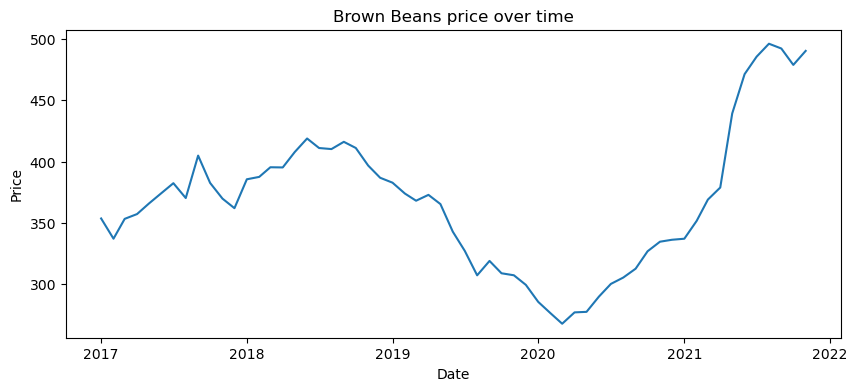

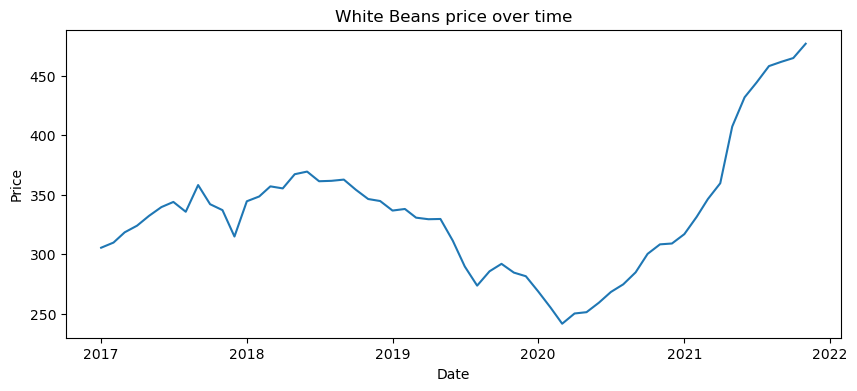

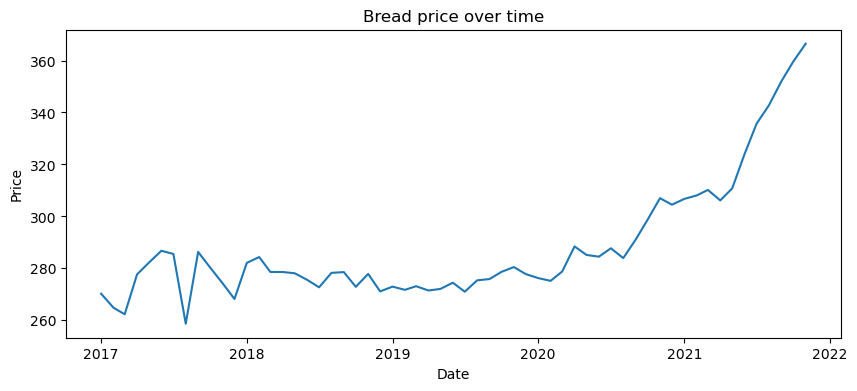

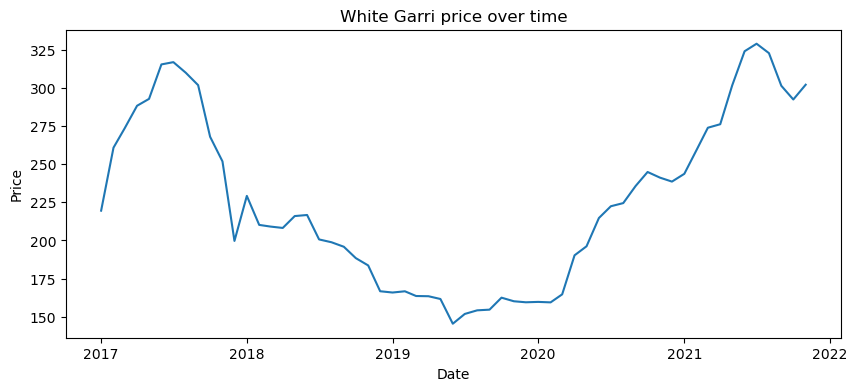

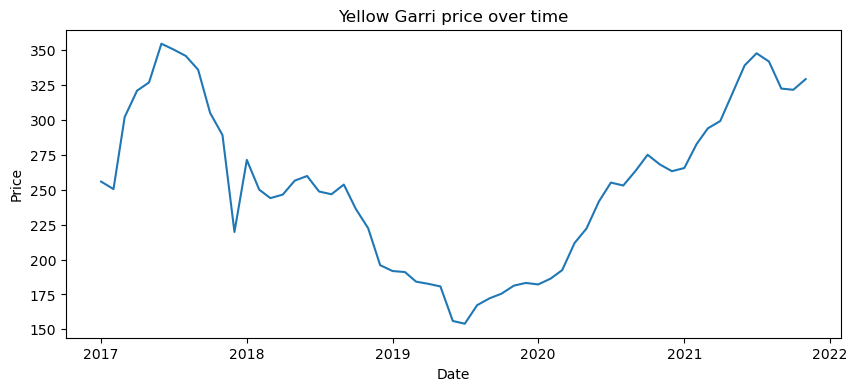

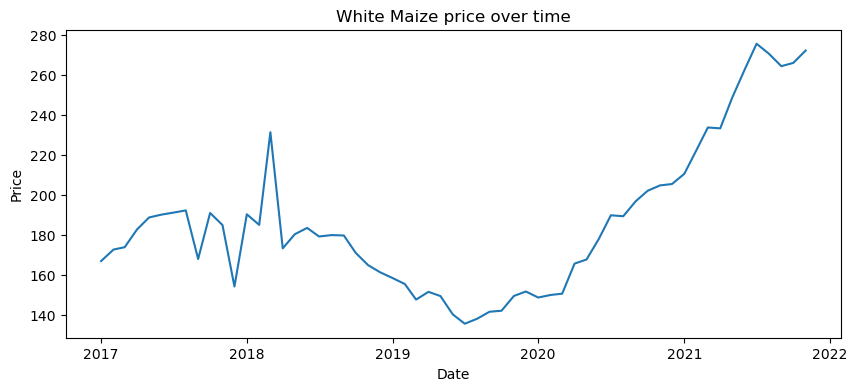

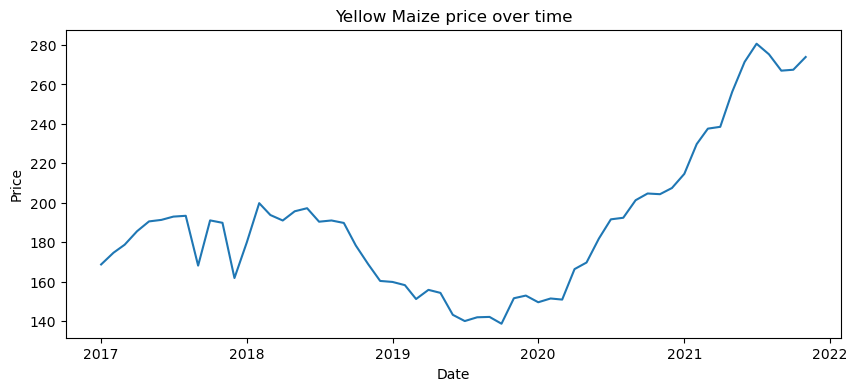

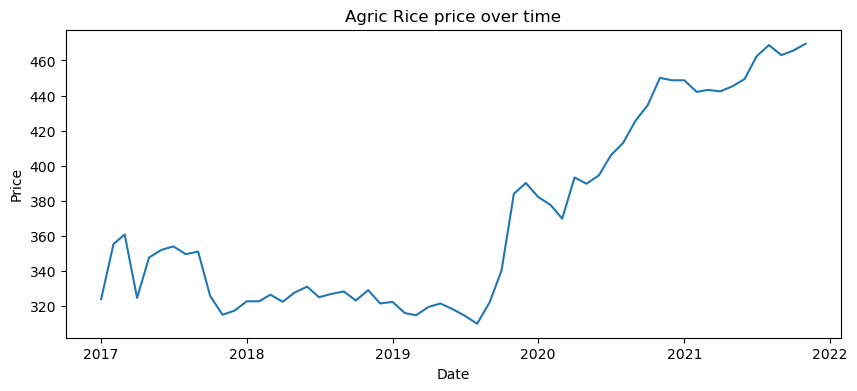

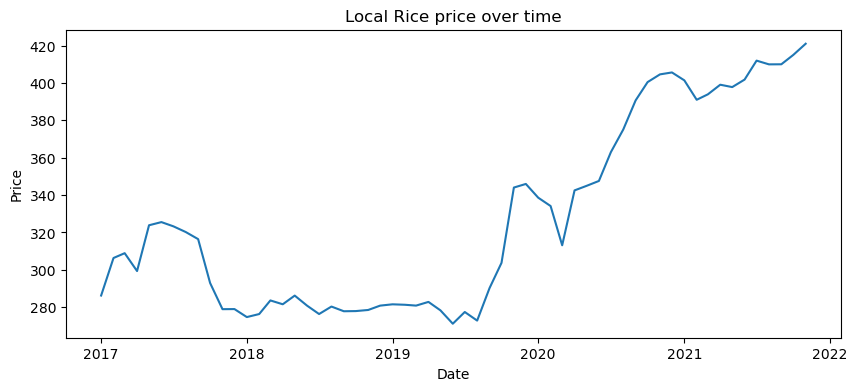

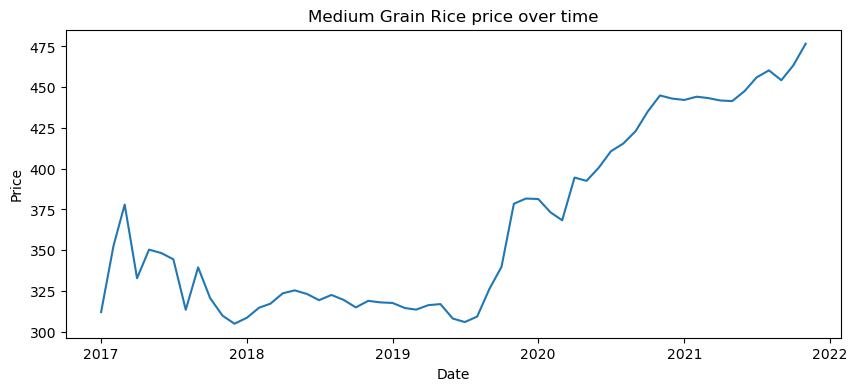

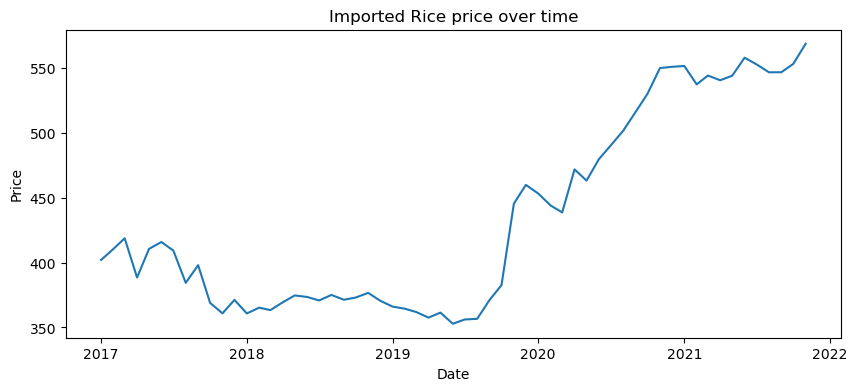

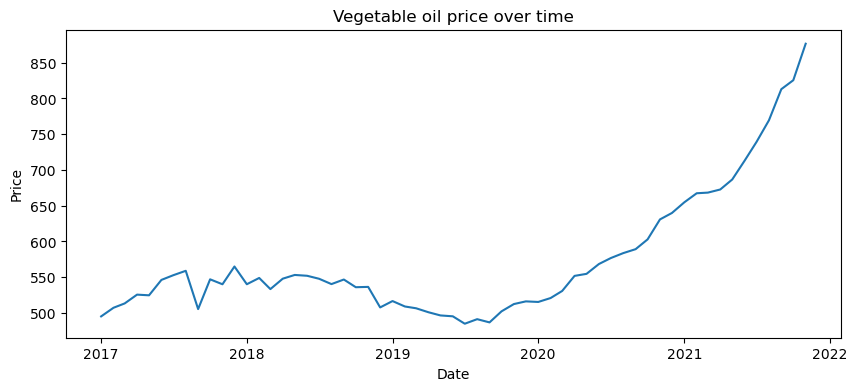

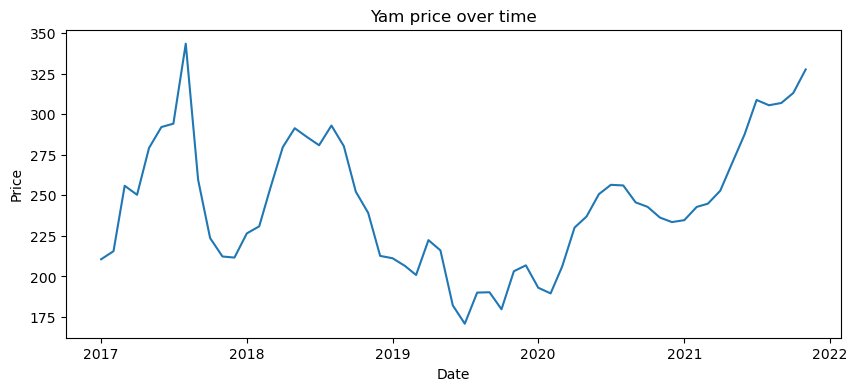

In [25]:
import matplotlib.pyplot as plt

for item in df_staples["Items_Clean"].unique():
    subset = df_staples[ df_staples["Items_Clean"] == item ]
    plt.figure(figsize=(10,4))
    plt.plot(subset['Date'], subset['Price'])
    plt.title(f'{item} price over time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

- Our EDA revealed that staple food prices were relatively stable or declining until 2020, after which they increased sharply — likely due to pandemic-related supply shocks and inflation.

- Add time features (We'll use this to check how/if seasonality affects food prices

In [28]:
df_staples['Year'] = df_staples['Date'].dt.year
df_staples['Month'] = df_staples['Date'].dt.month
df_staples['Quarter'] = df_staples['Date'].dt.quarter
df_staples

,Items,Date,Price,Items_Clean,Year,Month,Quarter
2,"Beans brown,sold loose",2017-01-01,353.60,Brown Beans,2017,1,1
3,Beans:white black eye. sold loose,2017-01-01,305.53,White Beans,2017,1,1
7,Bread unsliced 500g,2017-01-01,270.25,Bread,2017,1,1
18,"Gari white,sold loose",2017-01-01,219.56,White Garri,2017,1,1
19,"Gari yellow,sold loose",2017-01-01,255.83,Yellow Garri,2017,1,1
...,...,...,...,...,...,...,...
2643,Rice local sold loose,2021-11-01,421.02,Local Rice,2021,11,4
2644,Rice Medium Grained,2021-11-01,476.67,Medium Grain Rice,2021,11,4
2645,"Rice,imported high quality sold loose",2021-11-01,568.75,Imported Rice,2021,11,4
2650,"Vegetable oil:1 bottle,specify bottle",2021-11-01,876.47,Vegetable oil,2021,11,4


- Create lag features

- first we do the autocorellation plot ACF. 
 The ACF plot shows how strongly current prices are correlated with prices from previous months.
Each vertical bar represents the correlation between today's price and the price n months ago.
By checking this plot, we decide how many lag features (price from last month, two months ago, etc.) to include in the model.
Too many lags can introduce noise and cause overfitting, so we typically stop adding lags when autocorrelation drops to near zero.

<Figure size 1000x400 with 0 Axes>

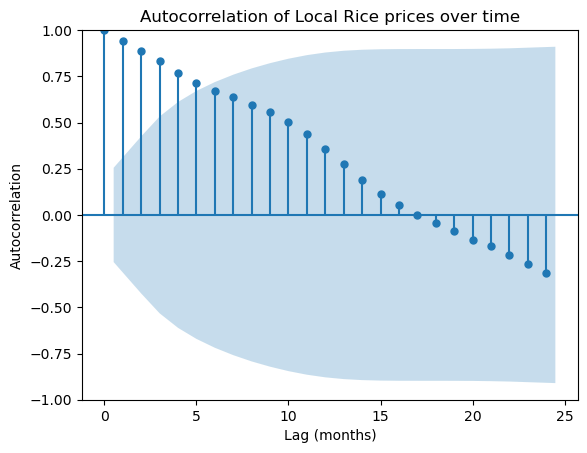

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

# Filter data to just local rice
rice_data = df_staples[df_staples['Items_Clean'] == 'Local Rice']

# Plot ACF
plt.figure(figsize=(10,4))
plot_acf(rice_data['Price'], lags=24)  # lags=24 to see up to 2 years if monthly data
plt.title('Autocorrelation of Local Rice prices over time')
plt.xlabel('Lag (months)')
plt.ylabel('Autocorrelation')
plt.show()


- The plot showed that the current price is highly correlated (>0.75) with prices from the previous 3 months.
Based on this, we create 3 lag features (price_lag1, price_lag2, price_lag3) for all food items to help the model remember recent price trends.

In [33]:
#create lag columns
max_lag = 3
for lag in range(1, max_lag+1):
    df_staples[f'Price_lag{lag}'] = df_staples.groupby("Items_Clean")["Price"].shift(lag)
df_staples.head()

,Items,Date,Price,Items_Clean,Year,Month,Quarter,Price_lag1,Price_lag2,Price_lag3
2,"Beans brown,sold loose",2017-01-01,353.60,Brown Beans,2017,1,1,NaN,NaN,NaN
3,Beans:white black eye. sold loose,2017-01-01,305.53,White Beans,2017,1,1,NaN,NaN,NaN
7,Bread unsliced 500g,2017-01-01,270.25,Bread,2017,1,1,NaN,NaN,NaN
18,"Gari white,sold loose",2017-01-01,219.56,White Garri,2017,1,1,NaN,NaN,NaN
19,"Gari yellow,sold loose",2017-01-01,255.83,Yellow Garri,2017,1,1,NaN,NaN,NaN


- NAN values are due to the fact that price lags means price from previous months, the columns with nan values, have no months before them and thus have no price lag.

In [35]:
dummies = pd.get_dummies(df_staples['Items_Clean'], prefix='Items_Clean', drop_first=True)
df_staples = pd.concat([df_staples,dummies], axis=1)
df_staples.head()

,Items,Date,Price,Items_Clean,Year,Month,Quarter,Price_lag1,Price_lag2,Price_lag3,...,Items_Clean_Imported Rice,Items_Clean_Local Rice,Items_Clean_Medium Grain Rice,Items_Clean_Vegetable oil,Items_Clean_White Beans,Items_Clean_White Garri,Items_Clean_White Maize,Items_Clean_Yam,Items_Clean_Yellow Garri,Items_Clean_Yellow Maize
2,"Beans brown,sold loose",2017-01-01,353.60,Brown Beans,2017,1,1,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,Beans:white black eye. sold loose,2017-01-01,305.53,White Beans,2017,1,1,NaN,NaN,NaN,...,False,False,False,False,True,False,False,False,False,False
7,Bread unsliced 500g,2017-01-01,270.25,Bread,2017,1,1,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
18,"Gari white,sold loose",2017-01-01,219.56,White Garri,2017,1,1,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,False
19,"Gari yellow,sold loose",2017-01-01,255.83,Yellow Garri,2017,1,1,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False


In [36]:
df_staples.dropna(inplace=True)
df_staples.head()

,Items,Date,Price,Items_Clean,Year,Month,Quarter,Price_lag1,Price_lag2,Price_lag3,...,Items_Clean_Imported Rice,Items_Clean_Local Rice,Items_Clean_Medium Grain Rice,Items_Clean_Vegetable oil,Items_Clean_White Beans,Items_Clean_White Garri,Items_Clean_White Maize,Items_Clean_Yam,Items_Clean_Yellow Garri,Items_Clean_Yellow Maize
137,"Beans brown,sold loose",2017-04-01,357.19,Brown Beans,2017,4,2,353.28,337.11,353.60,...,False,False,False,False,False,False,False,False,False,False
138,Beans:white black eye. sold loose,2017-04-01,324.04,White Beans,2017,4,2,318.45,309.85,305.53,...,False,False,False,False,True,False,False,False,False,False
142,Bread unsliced 500g,2017-04-01,277.69,Bread,2017,4,2,262.33,264.86,270.25,...,False,False,False,False,False,False,False,False,False,False
153,"Gari white,sold loose",2017-04-01,288.45,White Garri,2017,4,2,273.67,260.94,219.56,...,False,False,False,False,False,True,False,False,False,False
154,"Gari yellow,sold loose",2017-04-01,320.92,Yellow Garri,2017,4,2,302.05,250.45,255.83,...,False,False,False,False,False,False,False,False,True,False


- create features for our model. input feature(X), target feature(y)

In [38]:
features = ['Year','Month','Quarter','Price_lag1','Price_lag2','Price_lag3']
features += [col for col in df_staples.columns if col.startswith('Items_Clean_')]
X = df_staples[features]
y = df_staples['Price']

- Split data into training and testing

In [40]:
from sklearn.model_selection import train_test_split

# First, make sure it's sorted by date
df_staples = df_staples.sort_values('Date')

# Let's use 80% train, 20% test (you can adjust)
train_size = int(len(df_staples) * 0.8)

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

In [41]:
from sklearn.linear_model import LinearRegression

# Step 1: create model
model = LinearRegression()

# Step 2: train model on past data
model.fit(X_train, y_train)

# Step 3: predict future prices
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 8.67
RMSE: 12.31
R²: 0.99


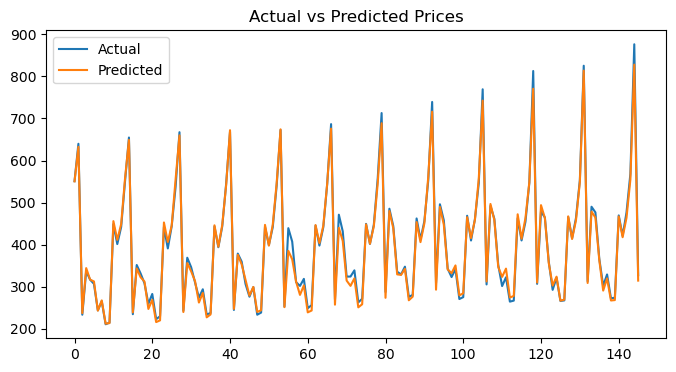

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()

- Predicting future price

In [45]:
#we need a new row(s) in the same format as the previously trained data
#lets predict the price for the next month that we dont have(2021 -12-01)
df_staples.tail()

,Items,Date,Price,Items_Clean,Year,Month,Quarter,Price_lag1,Price_lag2,Price_lag3,...,Items_Clean_Imported Rice,Items_Clean_Local Rice,Items_Clean_Medium Grain Rice,Items_Clean_Vegetable oil,Items_Clean_White Beans,Items_Clean_White Garri,Items_Clean_White Maize,Items_Clean_Yam,Items_Clean_Yellow Garri,Items_Clean_Yellow Maize
2613,Beans:white black eye. sold loose,2021-11-01,476.76,White Beans,2021,11,4,464.74,461.59,457.98,...,False,False,False,False,True,False,False,False,False,False
2612,"Beans brown,sold loose",2021-11-01,490.19,Brown Beans,2021,11,4,478.76,492.13,496.03,...,False,False,False,False,False,False,False,False,False,False
2650,"Vegetable oil:1 bottle,specify bottle",2021-11-01,876.47,Vegetable oil,2021,11,4,825.46,812.94,769.45,...,False,False,False,True,False,False,False,False,False,False
2634,Maize grain white sold loose,2021-11-01,272.42,White Maize,2021,11,4,266.23,264.59,270.79,...,False,False,False,False,False,False,True,False,False,False
2652,Yam tuber,2021-11-01,327.53,Yam,2021,11,4,313.05,306.87,305.48,...,False,False,False,False,False,False,False,True,False,False


In [158]:
# features = ['Year','Month','Quarter','Price_lag1','Price_lag2','Price_lag3']
# features += [col for col in df_staples.columns if col.startswith('Items_Clean_')]
# X = df_staples[features]
# y = df_staples['Price']

#get the last row for each item(or do one first)so you can extract the date from it, then derive the quarter, month from that date
# yam = df_staples[ df_staples['Items']== 'Yam tuber'].iloc[-1]
#use the price of that last row as price lag_1, then price_lag 1 and 2 become 2 and 3 for the new row
#get all the columns from that last row,put them all in a dictionary, append it to a list. repeat for each item
# yam
last_rows = []#holds all the last rows for all the items
items = []
dummy_cols = [col for col in df_staples.columns if col.startswith("Items_Clean_")]
# print(dummy_cols)
for col in dummy_cols:
    item = col.replace("Items_Clean_","")
    items.append(item)
    # print(item)
    last_row = df_staples[ df_staples[f"Items_Clean_{item}"] == 1].iloc[-1].copy()
    last_rows.append(last_row)
    # print(last_row)

forecasts = [] #to hold predictions for each food item

for step in range(1, 5+1):# for step in range(1, 12+1): #to make predictions up to next 12 months
    input_rows = []
    for row in last_rows:
        next_year = row['Year']
        next_month = row['Month'] + 1
        if next_month > 12:
            next_month = 1
            next_year += 1
        quarter = pd.Timestamp(year=next_year, month=next_month, day=1).quarter
    
        input = {
            'Year': next_year,
            'Month': next_month,
            'Quarter': quarter,
            'Price_lag1': row['Price'],
        }
        for i in range(2,4):
            input[f'Price_lag{i}'] = row[f'Price_lag{i-1}'] #add price lags 2 and 3 to the features 
        
        for cols in row.index:
            if cols.startswith('Items_Clean_'):
                input[cols] = row[cols] #add the dummy columns to the features
    
        input_rows.append(input)
                
        input_df = pd.DataFrame(input_rows)
        predictions = model.predict(input_df)
    
        #create a dictionary to structure the predictions. the item, price, date, then put the dictionary in the forecasts list
    for i,rows in enumerate(input_rows):
        forecast = {
            "Item": items[i],
            "Year": rows['Year'],
            "Month": rows["Month"],
            "Price": predictions[i],
        }
        forecasts.append(forecast)
    
        last_rows[i]['Year'] = rows['Year']
        last_rows[i]['Month'] = rows['Month']
        last_rows[i]['Price_lag3'] = last_rows[i]['Price_lag2']
        last_rows[i]['Price_lag2'] = last_rows[i]['Price_lag1']
        last_rows[i]['Price_lag1'] = last_rows[i]['Price']
        last_rows[i]['Price'] = predictions[i]

print(pd.DataFrame(forecasts)) 

                 Item  Year  Month       Price
0               Bread  2021     12  369.026956
1         Brown Beans  2021     12  486.794704
2       Imported Rice  2021     12  570.006687
3          Local Rice  2021     12  423.387183
4   Medium Grain Rice  2021     12  477.965747
5       Vegetable oil  2021     12  871.021145
6         White Beans  2021     12  474.965533
7         White Garri  2021     12  300.501967
8         White Maize  2021     12  273.451111
9                 Yam  2021     12  328.171151
10       Yellow Garri  2021     12  328.696038
11       Yellow Maize  2021     12  274.738253
12              Bread  2022      1  376.655436
13        Brown Beans  2022      1  492.559582
14      Imported Rice  2022      1  578.065156
15         Local Rice  2022      1  431.044135
16  Medium Grain Rice  2022      1  485.312390
17      Vegetable oil  2022      1  878.082728
18        White Beans  2022      1  480.037237
19        White Garri  2022      1  306.875594
20        Whi

In [172]:
df_forecasts = pd.DataFrame(forecasts)
df_forecasts.groupby('Item', as_index=False)['Price'].mean()

,Item,Price
0,Bread,382.126643
1,Brown Beans,494.744196
2,Imported Rice,582.380202
3,Local Rice,436.660998
4,Medium Grain Rice,489.303532
5,Vegetable oil,874.810492
6,White Beans,481.644985
7,White Garri,310.130767
8,White Maize,285.062849
9,Yam,339.231458
